### Deliverable 1: Preprocessing the Data for a Neural Network

In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

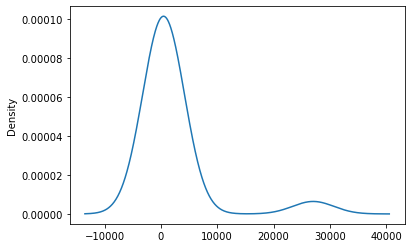

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1580        1
C1570        1
C8210        1
C1283        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

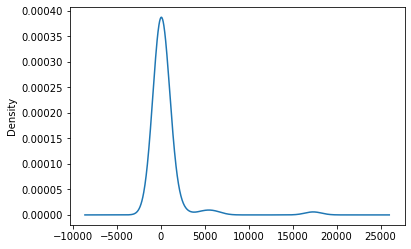

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
len(X_train_scaled[0])

43

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes1 = 50
hidden_nodes2 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2200      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and file names
os.makedirs("checkpoints_optimizer3/", exist_ok=True)
checkpoint_path = "checkpoints_optimizer3/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/804 [..............................] - ETA: 4:49 - loss: 10.6047 - accuracy: 0.3125
Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656   
Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5
 56/804 [=>............................] - ETA: 1s - los


Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5
501/804 [=================>............] - ETA: 0s - loss: 8.1743 - accuracy: 0.4701
Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8.1754 - accuracy: 0.4700
Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epoch 00001: saving model to checkpoints_optimizer3/weights.01.hdf5

Epo

172/804 [=====>........................] - ETA: 1s - loss: 8.0712 - accuracy: 0.4767
Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 8.1038 - accuracy: 0.4746
Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5
232/


Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 8.2058 - accuracy: 0.4680
Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 8.1972 - accuracy: 0.4686
Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epoch 00002: saving model to checkpoints_optimizer3/weights.02.hdf5

Epo


Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5
383/804 [=============>................] - ETA: 0s - loss: 8.1555 - accuracy: 0.4713
Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5
413/804 [==============>...............] - ETA: 0s - loss: 8.1758 - accuracy: 0.4700
Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epoch 00003: saving model to checkpoints_optimizer3/weights.03.hdf5

Epo


Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 8.2599 - accuracy: 0.4645
Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5
 89/804 [==>...........................] - ETA: 1s - loss: 8.2703 - accuracy: 0.4638
Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epo


Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 8.1876 - accuracy: 0.4692
Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 8.1937 - accuracy: 0.4688
Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epoch 00004: saving model to checkpoints_optimizer3/weights.04.hdf5

Epo


Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5
240/804 [=======>......................] - ETA: 0s - loss: 8.1443 - accuracy: 0.4720
Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5
270/804 [=========>....................] - ETA: 0s - loss: 8.1659 - accuracy: 0.4706
Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epo


Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 8.2119 - accuracy: 0.4676
Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5
780/804 [============================>.] - ETA: 0s - loss: 8.2038 - accuracy: 0.4681
Epoch 00005: saving model to checkpoints_optimizer3/weights.05.hdf5

Epo


Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 8.2060 - accuracy: 0.4680
Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 8.2041 - accuracy: 0.4681
Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epoch 00006: saving model to checkpoints_optimizer3/weights.06.hdf5

Epo


Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 8.2769 - accuracy: 0.4634
Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 8.2601 - accuracy: 0.4645
Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epo

597/804 [=====================>........] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2306 - accuracy: 0.4664
Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5

Epoch 00007: saving model to checkpoints_optimizer3/weights.07.hdf5
657/


Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5
298/804 [==========>...................] - ETA: 0s - loss: 8.2932 - accuracy: 0.4624
Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5
328/804 [===========>..................] - ETA: 0s - loss: 8.2680 - accuracy: 0.4640
Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epo

778/804 [============================>.] - ETA: 0s - loss: 8.2019 - accuracy: 0.4683
Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5

Epoch 00008: saving model to checkpoints_optimizer3/weights.08.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - accuracy: 0.4676
Epoch 9/50
  1/804 [..............................] - ETA: 0s - loss: 9.1586 - accuracy: 0.4062
Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_


Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5
479/804 [================>.............] - ETA: 0s - loss: 8.1915 - accuracy: 0.4689
Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5
509/804 [=================>............] - ETA: 0s - loss: 8.2153 - accuracy: 0.4674
Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epoch 00009: saving model to checkpoints_optimizer3/weights.09.hdf5

Epo

150/804 [====>.........................] - ETA: 1s - loss: 8.3680 - accuracy: 0.4575
Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 8.3043 - accuracy: 0.4616
Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5
210/


Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.2252 - accuracy: 0.4668
Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 8.2490 - accuracy: 0.4652
Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epoch 00010: saving model to checkpoints_optimizer3/weights.10.hdf5

Epo

331/804 [===========>..................] - ETA: 0s - loss: 8.2673 - accuracy: 0.4640
Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5
361/804 [============>.................] - ETA: 0s - loss: 8.2092 - accuracy: 0.4678
Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5

Epoch 00011: saving model to checkpoints_optimizer3/weights.11.hdf5
391/


Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 8.3195 - accuracy: 0.4606
Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 8.2706 - accuracy: 0.4638
Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epo


Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 8.2411 - accuracy: 0.4657
Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 8.2456 - accuracy: 0.4654
Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epoch 00012: saving model to checkpoints_optimizer3/weights.12.hdf5

Epo


Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 8.2339 - accuracy: 0.4662
Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 8.2330 - accuracy: 0.4663
Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epo

688/804 [========================>.....] - ETA: 0s - loss: 8.2330 - accuracy: 0.4663
Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 8.2301 - accuracy: 0.4664
Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5

Epoch 00013: saving model to checkpoints_optimizer3/weights.13.hdf5
748/


Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5
389/804 [=============>................] - ETA: 0s - loss: 8.2465 - accuracy: 0.4654
Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 8.2141 - accuracy: 0.4675
Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epoch 00014: saving model to checkpoints_optimizer3/weights.14.hdf5

Epo


Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 8.1222 - accuracy: 0.4734
Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 8.1517 - accuracy: 0.4715
Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epo


Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2047 - accuracy: 0.4681
Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epoch 00015: saving model to checkpoints_optimizer3/weights.15.hdf5

Epo

241/804 [=======>......................] - ETA: 0s - loss: 8.2865 - accuracy: 0.4628
Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 8.2692 - accuracy: 0.4639
Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5
301/


Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 8.2170 - accuracy: 0.4673
Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5
781/804 [============================>.] - ETA: 0s - loss: 8.2198 - accuracy: 0.4671
Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5

Epoch 00016: saving model to checkpoints_optimizer3/weights.16.hdf5
804/


Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 8.2355 - accuracy: 0.4661
Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5
477/804 [================>.............] - ETA: 0s - loss: 8.2198 - accuracy: 0.4671
Epoch 00017: saving model to checkpoints_optimizer3/weights.17.hdf5

Epo


Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.0883 - accuracy: 0.4756
Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 8.2173 - accuracy: 0.4673
Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epo


Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.1753 - accuracy: 0.4700
Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.1835 - accuracy: 0.4695
Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epoch 00018: saving model to checkpoints_optimizer3/weights.18.hdf5

Epo

299/804 [==========>...................] - ETA: 0s - loss: 8.1478 - accuracy: 0.4718
Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 8.1857 - accuracy: 0.4693
Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5

Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5
359/


Epoch 00019: saving model to checkpoints_optimizer3/weights.19.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - accuracy: 0.4676
Epoch 20/50
  1/804 [..............................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 7.9856 - accuracy: 0.4823
Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints

480/804 [================>.............] - ETA: 0s - loss: 8.1473 - accuracy: 0.4718
Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 8.1558 - accuracy: 0.4713
Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5

Epoch 00020: saving model to checkpoints_optimizer3/weights.20.hdf5
540/


Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 8.3676 - accuracy: 0.4575
Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.3658 - accuracy: 0.4576
Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epo

661/804 [=======================>......] - ETA: 0s - loss: 8.2346 - accuracy: 0.4661
Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 8.2245 - accuracy: 0.4668
Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5

Epoch 00021: saving model to checkpoints_optimizer3/weights.21.hdf5
721/


Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5
357/804 [============>.................] - ETA: 0s - loss: 8.2647 - accuracy: 0.4642
Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5
387/804 [=============>................] - ETA: 0s - loss: 8.2568 - accuracy: 0.4647
Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epoch 00022: saving model to checkpoints_optimizer3/weights.22.hdf5

Epo

 29/804 [>.............................] - ETA: 1s - loss: 8.0782 - accuracy: 0.4763
Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 8.2111 - accuracy: 0.4677
Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5
 88/


Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 8.2325 - accuracy: 0.4663
Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 8.2305 - accuracy: 0.4664
Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epoch 00023: saving model to checkpoints_optimizer3/weights.23.hdf5

Epo

209/804 [======>.......................] - ETA: 1s - loss: 8.2614 - accuracy: 0.4644
Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5
239/804 [=======>......................] - ETA: 0s - loss: 8.2490 - accuracy: 0.4652
Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5
269/


Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 8.2321 - accuracy: 0.4663
Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epoch 00024: saving model to checkpoints_optimizer3/weights.24.hdf5

Epo

390/804 [=============>................] - ETA: 0s - loss: 8.2044 - accuracy: 0.4681
Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5
420/804 [==============>...............] - ETA: 0s - loss: 8.2106 - accuracy: 0.4677
Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5

Epoch 00025: saving model to checkpoints_optimizer3/weights.25.hdf5
450/


Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 8.2528 - accuracy: 0.4650
Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 8.2582 - accuracy: 0.4646
Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epo


Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 8.2426 - accuracy: 0.4656
Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2515 - accuracy: 0.4651
Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epoch 00026: saving model to checkpoints_optimizer3/weights.26.hdf5

Epo


Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5
267/804 [========>.....................] - ETA: 0s - loss: 8.2830 - accuracy: 0.4630
Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5
297/804 [==========>...................] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epo

747/804 [==========================>...] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2187 - accuracy: 0.4672
Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5

Epoch 00027: saving model to checkpoints_optimizer3/weights.27.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - a


Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 8.1999 - accuracy: 0.4684
Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.1905 - accuracy: 0.4690
Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epoch 00028: saving model to checkpoints_optimizer3/weights.28.hdf5

Epo


Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 8.4011 - accuracy: 0.4554
Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 8.3368 - accuracy: 0.4595
Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epo


Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 8.2428 - accuracy: 0.4656
Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epoch 00029: saving model to checkpoints_optimizer3/weights.29.hdf5

Epo


Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5
300/804 [==========>...................] - ETA: 0s - loss: 8.1575 - accuracy: 0.4711
Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5
330/804 [===========>..................] - ETA: 0s - loss: 8.1726 - accuracy: 0.4702
Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5

Epo


Epoch 00030: saving model to checkpoints_optimizer3/weights.30.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - accuracy: 0.4676
Epoch 31/50
  1/804 [..............................] - ETA: 0s - loss: 7.2304 - accuracy: 0.5312
Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5
 31/804 [>.............................] - ETA: 1s - loss: 8.0390 - accuracy: 0.4788
Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints

481/804 [================>.............] - ETA: 0s - loss: 8.1664 - accuracy: 0.4706
Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 8.1756 - accuracy: 0.4700
Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5

Epoch 00031: saving model to checkpoints_optimizer3/weights.31.hdf5
541/


Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 8.2762 - accuracy: 0.4635
Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 8.2364 - accuracy: 0.4660
Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epo

657/804 [=======================>......] - ETA: 0s - loss: 8.2305 - accuracy: 0.4664
Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 8.2149 - accuracy: 0.4674
Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5

Epoch 00032: saving model to checkpoints_optimizer3/weights.32.hdf5
717/


Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5
358/804 [============>.................] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5
388/804 [=============>................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epoch 00033: saving model to checkpoints_optimizer3/weights.33.hdf5

Epo


Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5
 31/804 [>.............................] - ETA: 1s - loss: 8.3189 - accuracy: 0.4607
Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 8.0801 - accuracy: 0.4762
Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epo


Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 8.2135 - accuracy: 0.4675
Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 8.2347 - accuracy: 0.4661
Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epoch 00034: saving model to checkpoints_optimizer3/weights.34.hdf5

Epo

210/804 [======>.......................] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656
Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5
240/804 [=======>......................] - ETA: 0s - loss: 8.2969 - accuracy: 0.4621
Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5
270/


Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 8.2213 - accuracy: 0.4670
Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 8.2209 - accuracy: 0.4670
Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epoch 00035: saving model to checkpoints_optimizer3/weights.35.hdf5

Epo

391/804 [=============>................] - ETA: 0s - loss: 8.2549 - accuracy: 0.4648
Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 8.2575 - accuracy: 0.4647
Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5

Epoch 00036: saving model to checkpoints_optimizer3/weights.36.hdf5
451/


Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 8.2056 - accuracy: 0.4680
Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 8.2151 - accuracy: 0.4674
Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epo


Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 8.1961 - accuracy: 0.4686
Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.1907 - accuracy: 0.4690
Epoch 00037: saving model to checkpoints_optimizer3/weights.37.hdf5

Epo


Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5
268/804 [=========>....................] - ETA: 0s - loss: 8.1136 - accuracy: 0.4740
Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5
298/804 [==========>...................] - ETA: 0s - loss: 8.1411 - accuracy: 0.4722
Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epo


Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5
778/804 [============================>.] - ETA: 0s - loss: 8.2348 - accuracy: 0.4661
Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5

Epoch 00038: saving model to checkpoints_optimizer3/weights.38.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - accuracy: 0.4676
Epoch 39/50
  1/804 [..............................] - ETA: 0s - loss: 11.0867 - accuracy: 0.2812
Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoint


Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 8.1602 - accuracy: 0.4710
Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5
479/804 [================>.............] - ETA: 0s - loss: 8.1643 - accuracy: 0.4707
Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epoch 00039: saving model to checkpoints_optimizer3/weights.39.hdf5

Epo


Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 8.1420 - accuracy: 0.4722
Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.1422 - accuracy: 0.4721
Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epo


Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.1841 - accuracy: 0.4694
Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.1839 - accuracy: 0.4694
Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epoch 00040: saving model to checkpoints_optimizer3/weights.40.hdf5

Epo


Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5
331/804 [===========>..................] - ETA: 0s - loss: 8.2280 - accuracy: 0.4666
Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5
361/804 [============>.................] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epoch 00041: saving model to checkpoints_optimizer3/weights.41.hdf5

Epo


Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5
 27/804 [>.............................] - ETA: 1s - loss: 8.4802 - accuracy: 0.4502 
Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5
 57/804 [=>............................] - ETA: 1s - loss: 8.6004 - accuracy: 0.4424
Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Ep

507/804 [=================>............] - ETA: 0s - loss: 8.2534 - accuracy: 0.4649
Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 8.2322 - accuracy: 0.4663
Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5

Epoch 00042: saving model to checkpoints_optimizer3/weights.42.hdf5
567/


Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 8.2362 - accuracy: 0.4660
Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 8.2006 - accuracy: 0.4684
Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epo

688/804 [========================>.....] - ETA: 0s - loss: 8.1560 - accuracy: 0.4712
Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 8.1824 - accuracy: 0.4695
Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5

Epoch 00043: saving model to checkpoints_optimizer3/weights.43.hdf5
748/


Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5
389/804 [=============>................] - ETA: 0s - loss: 8.2887 - accuracy: 0.4626
Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 8.2773 - accuracy: 0.4634
Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epoch 00044: saving model to checkpoints_optimizer3/weights.44.hdf5

Epo


Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 8.2668 - accuracy: 0.4641
Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5
 90/804 [==>...........................] - ETA: 1s - loss: 8.3338 - accuracy: 0.4597
Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epo


Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.1725 - accuracy: 0.4702
Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 8.1913 - accuracy: 0.4690
Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epoch 00045: saving model to checkpoints_optimizer3/weights.45.hdf5

Epo

241/804 [=======>......................] - ETA: 0s - loss: 8.2265 - accuracy: 0.4667
Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5
271/804 [=========>....................] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5
301/


Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 8.2125 - accuracy: 0.4676
Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5
781/804 [============================>.] - ETA: 0s - loss: 8.2044 - accuracy: 0.4681
Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epoch 00046: saving model to checkpoints_optimizer3/weights.46.hdf5

Epo


Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5
472/804 [================>.............] - ETA: 0s - loss: 8.2047 - accuracy: 0.4681
Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epoch 00047: saving model to checkpoints_optimizer3/weights.47.hdf5

Epo


Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.3334 - accuracy: 0.4597
Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 8.2857 - accuracy: 0.4628
Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epo


Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2048 - accuracy: 0.4681
Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epoch 00048: saving model to checkpoints_optimizer3/weights.48.hdf5

Epo

299/804 [==========>...................] - ETA: 0s - loss: 8.2961 - accuracy: 0.4622
Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5
329/804 [===========>..................] - ETA: 0s - loss: 8.2751 - accuracy: 0.4635
Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5
359/


Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5

Epoch 00049: saving model to checkpoints_optimizer3/weights.49.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2126 - accuracy: 0.4676
Epoch 50/50
  1/804 [..............................] - ETA: 0s - loss: 9.1586 - accuracy: 0.4062
Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5
 30/804 [>.............................] - ETA: 1s - loss: 8.3070 - accuracy: 0.4615
Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints

480/804 [================>.............] - ETA: 0s - loss: 8.2427 - accuracy: 0.4656
Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 8.2455 - accuracy: 0.4654
Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5

Epoch 00050: saving model to checkpoints_optimizer3/weights.50.hdf5
540/

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 4.6208 - accuracy: 0.4672
Loss: 4.6208271980285645, Accuracy: 0.4671719968318939


In [21]:
# Export the model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")